# **Image Basics in OpenCV**

An image is a 2D-grid of values that represent the light intensities at various points on an image. Therefore, to manipulate an image, is to manipulate this grid of values.

For this reason, we will make use of the numpy library which is commonly abbreviated as np. Moreover, we will be using the Matplolib library (and specifically the pyplot package) to display the images in our notebook. Do note that OpenCV does include image display capabilities, but does so on a new window, rather than in the notebook. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

**OpenCV**, (Open Source Computer Vision Library) is an open-source computer vision and machine learning software library. It provides a wide range of tools and functionalities for image and video analysis, including computer vision algorithms, machine learning models, and image processing techniques.

In order to use the suite of functions provided by OpenCV, you must first import the library through the following line and optionally assign it an alias of cv.

In [3]:
import cv2

## **`cv2.imread()`**

In OpenCV, the `imread()` function is used to read an image from a file. This is exactly the same as the `imread()` function provided by Matplotlib with one significant change. Before continuing, you should know that: 

---

Traditional images contain three 2D-grids that are stacked on top of each other. These grids only relay the light intensities but provide no information as to what light color they are referring to. This is where the concept of a 'color map' comes into play. For an RGB color map, the first grid represents the light intensity of red in the image, the second grid represents the light of green in the image, and the last grid reprsesents the light intensity of blue in the image.

However, RGB is not the sole color space (although it is the most traditional one); alternatives include BGR, HSV, HSL, and more. Challenges arise when an image, intended for display in the RGB color space, is mistakenly presented in another color space, such as HSV or BGR. This leads to distortions in the appearance of the image and other undesirable effects.

---

That being mentioned, the `imread()` method in OpenCV reads an image in the BGR format. While not inherently problematic, it becomes an issue when we utilize Matplotlib's `imshow()` to display images in the notebook. This is due to the fact that Matplotlib's `imshow()` expects an image adhering to the RGB color space.

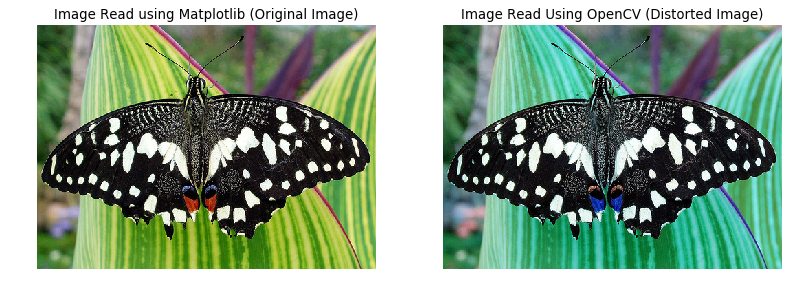

In [22]:
img_butterfly_matplotlib = plt.imread('data/images/butterfly.jpg')
img_butterfly_opencv = cv2.imread('data/images/butterfly.jpg')

plt.figure(figsize = (12, 8))

plt.subplot(121)
plt.imshow(img_butterfly_matplotlib)
plt.title("Image Read using Matplotlib (Original Image)")
plt.axis('off')

plt.subplot(122)
plt.imshow(img_butterfly_opencv)
plt.title("Image Read Using OpenCV (Distorted Image)")
plt.axis('off');

To address this, we will make use of the `cvtColor()` method that allows users to change the coloring scheme of an image. Again, take benefit from the `Shift + Tab` feature to see the function signature of this method.

`cv2.cvtColor(src = , code = )`

- src: The input image
- code: Specify the conversion code that determines the type of color space conversion. Some common values include:
    - cv2.COLOR_BGR2RGB: Convert from BGR to RGB (4)
    - cv2.COLOR_BGR2GRAY: Convert from BGR to grayscale (6)
    - cv2.COLOR_RGB2BGR: Convert from RGB to BGR (3)
    - cv2.COLOR_GRAY2BGR: Convert from grayscale to BGR (8)
    - cv2.COLOR_GRAY2RGB: Convert from grayscale to RGB (7)
    
For those wondering about the numbers in parentheses, each of the code values mentioned corresponds to an integer in OpenCV. This is akin to the concept of mapping constants to integers, similar to ENUMS in Java.

In practice, rather than memorizing the numeric values associated with each conversion, it is more convenient to use meaningful constants. For example, it is easier to know what `COLOR_BGR2RGB` does than what `4` does.

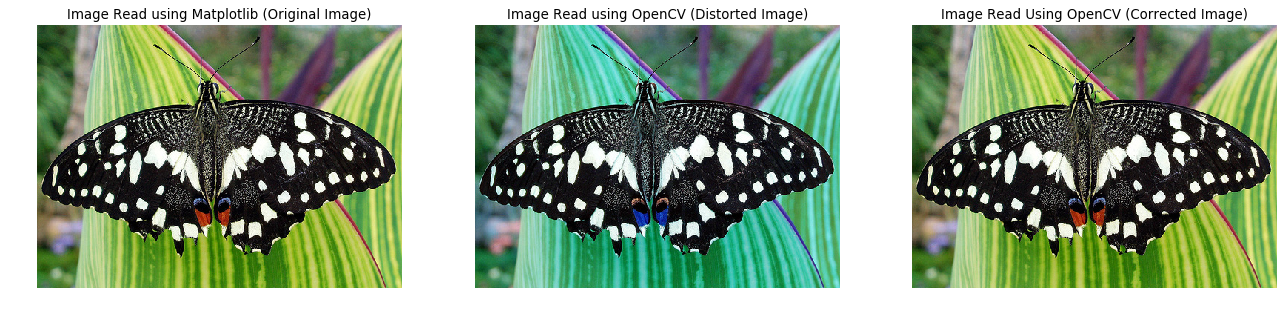

In [25]:
img_butterfly_opencv_corrected = cv2.cvtColor(img_butterfly_opencv, cv2.COLOR_BGR2RGB) # cv2.cvtColor(img_butterfly_opencv, 4) would work as well 

plt.figure(figsize = (20, 8))

plt.subplot(131)
plt.imshow(img_butterfly_matplotlib)
plt.title("Image Read using Matplotlib (Original Image)")
plt.axis('off')

plt.subplot(132)
plt.imshow(img_butterfly_opencv)
plt.title("Image Read using OpenCV (Distorted Image)")
plt.axis('off')


plt.subplot(133)
plt.imshow(img_butterfly_opencv_corrected)
plt.title("Image Read Using OpenCV (Corrected Image)")
plt.axis('off');

## **`cv2.split`**

Moving on, the `split()` function in OpenCV is used to split a multi-channel image into its individual channels. When you have an image with multiple color channels (such as Red, Green, and Blue in an RGB image), `split()` helps separate these channels into individual images.

In [27]:
img_BGR = cv2.imread('data/images/butterfly.jpg')
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)

red_channel, green_channel, blue_channel = cv2.split(img_RGB)

Now, each channel represents a distinct 2D grid. Typically, an image containing only a single channel is referred to as a grayscale image. Let's visualize each of these three grayscale images.

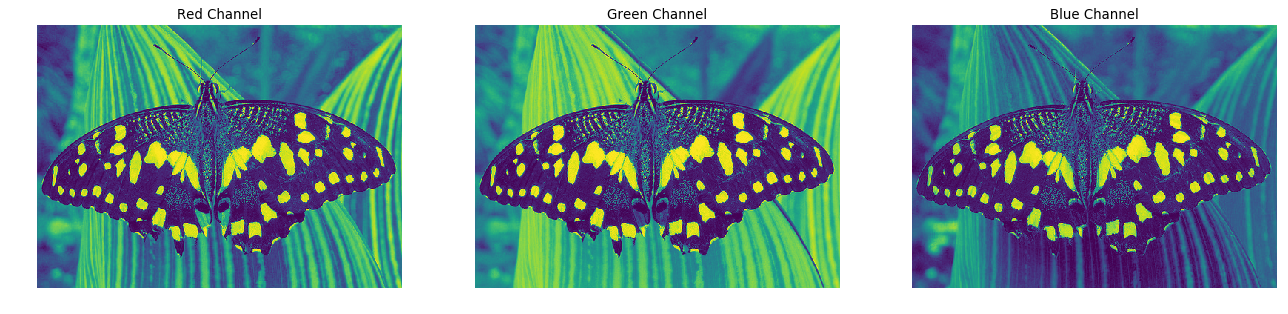

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,6))

ax1.imshow(red_channel)
ax1.set_title("Red Channel")
ax1.axis('off')

ax2.imshow(green_channel)
ax2.set_title("Green Channel")
ax2.axis('off')

ax3.imshow(blue_channel)
ax3.set_title("Blue Channel")
ax3.axis('off');

Several aspects to consider. Firstly, I've used the `subplots()` method, but feel free to use the method you find most comfortable. I'll vary between `subplots()` and `subplot()` so you can become comfortable with both.

Now, you might be curious as to why the images display in color when they are grayscale. This occurs because Matplotlib automatically applies a colormap to grayscale images to enhance visualization. The current colormap is named "viridis." To switch the colormap to grayscale, you can adjust the `cmap` parameter in the `imshow()` method call.

For a full listing of all the color maps provided by Matpotlib, [click here](https://matplotlib.org/stable/gallery/color/colormap_reference.html)

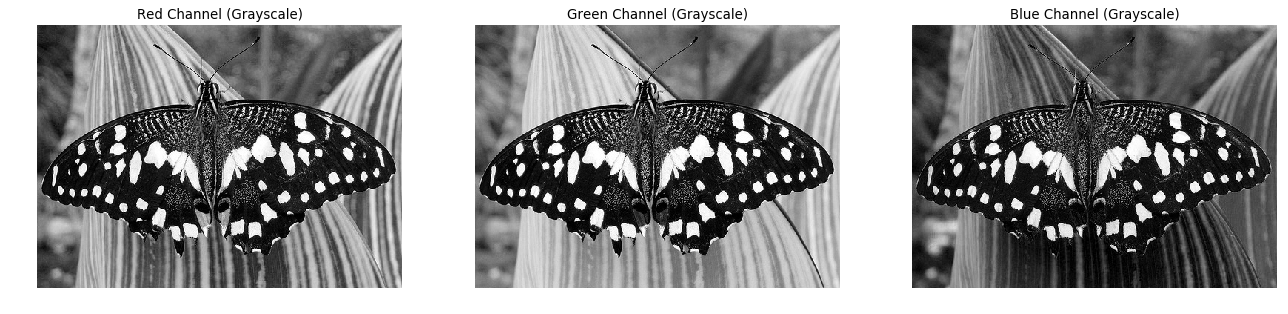

In [30]:
plt.figure(figsize = (20, 6))

plt.subplot(131)
plt.imshow(red_channel, cmap = 'gray')
plt.title("Red Channel (Grayscale)")
plt.axis('off')

plt.subplot(132)
plt.imshow(green_channel, cmap = 'gray')
plt.title("Green Channel (Grayscale)")
plt.axis('off')

plt.subplot(133)
plt.imshow(blue_channel, cmap = 'gray')
plt.title("Blue Channel (Grayscale)")
plt.axis('off');

Now how exactly do we interpret these grayscale images? 
- As for the "Red Channel (Grayscale)", the more white a particular region is, the more red it has. The more black a particular region is, the less red it has.
- As for the "Green Channel (Grayscale)", the more white a particular region is, the more green it has. The more black a particular region is, the less green it has.
- As for the "Blue" Channel (Grayscale)", the more white a particular region is, the more blue it has. The more black a particular region is, the less blue it has.

We may also apply a separate color map for each of these channels, to visualize their actual colors:

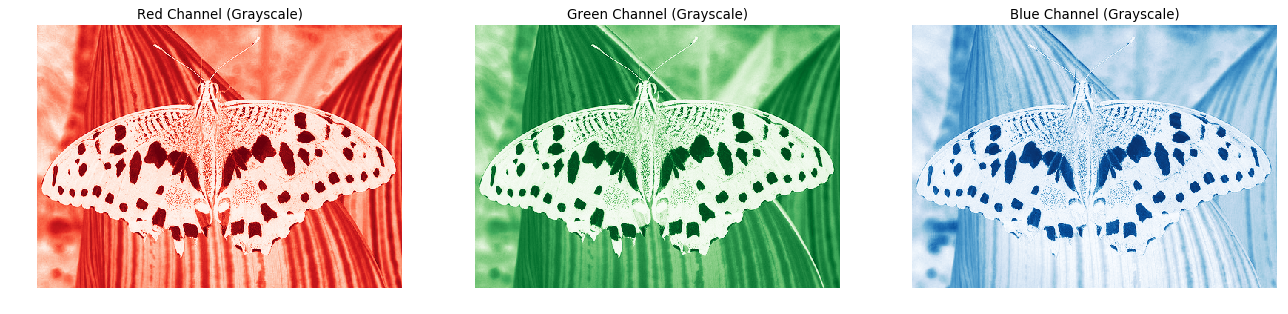

In [31]:
plt.figure(figsize = (20, 6))

plt.subplot(131)
plt.imshow(red_channel, cmap = 'Reds') # Regions with more red appear dark red. Regions with less red appear light red.
plt.title("Red Channel (Grayscale)")
plt.axis('off')

plt.subplot(132)
plt.imshow(green_channel, cmap = 'Greens') # Regions with more green appear dark green. Regions with less green appear light green.
plt.title("Green Channel (Grayscale)")
plt.axis('off')

plt.subplot(133)
plt.imshow(blue_channel, cmap = 'Blues') # Regions with more blue appear dark blue. Regions with less blue appear light blue.
plt.title("Blue Channel (Grayscale)")
plt.axis('off');

You can always invert a color map by following the color map's name with an underscore followed by an 'r'.

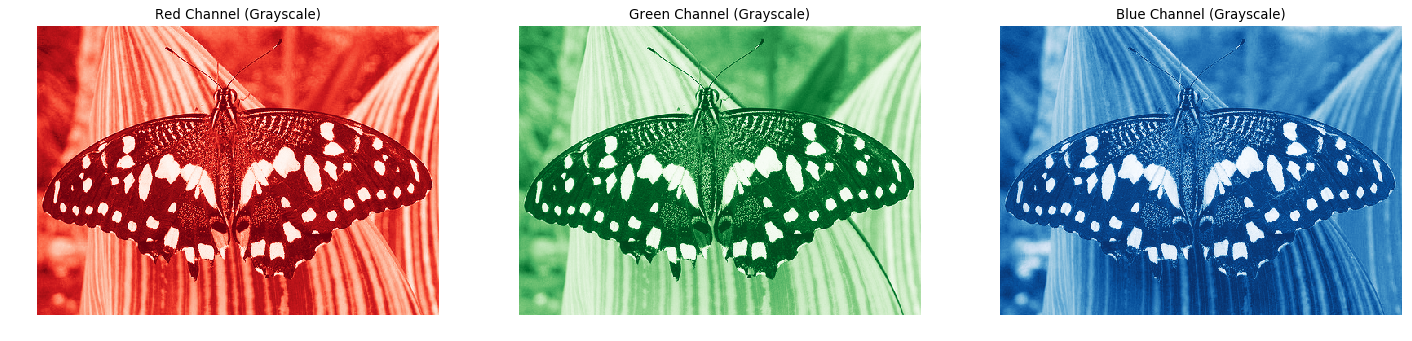

In [33]:
plt.figure(figsize = (22, 6))

plt.subplot(131)
plt.imshow(red_channel, cmap = 'Reds_r') # Regions with more red appear light red. Regions with less red appear dark red.
plt.title("Red Channel (Grayscale)")
plt.axis('off')

plt.subplot(132)
plt.imshow(green_channel, cmap = 'Greens_r') # Regions with more green appear light green. Regions with less green appear dark green.
plt.title("Green Channel (Grayscale)")
plt.axis('off')

plt.subplot(133)
plt.imshow(blue_channel, cmap = 'Blues_r') # Regions with more blue appear light blue. Regions with less blue appear dark blue.
plt.title("Blue Channel (Grayscale)")
plt.axis('off');

In my opinion, this is much better to look at than what we had before.

## **HSV Color Space**

Before delving into the HSV color space, it's essential to touch upon the data type of images. An image, represented as a NumPy array, can have:
- **Whole number values:** Ranging from 0 to 255 (8-bit unsigned integers -> np.uint8)
- **Floating-point values:** Ranging from 0 to 1 (np.float64)

The first structure, involving whole numbers, is preferred for image visualization, while the second structure, with floating-point values, is used when engaged performing manipulations on image channels.

---

The **HSV (Hue, Saturation, Value) color space** is a representation of colors that separates the color (hue), the intensity of the color (saturation), and the brightness of the color (value). It is an alternative to the more common RGB (Red, Green, Blue) color space and is commonly used for easier image manipulation.

- Hue (H): It represents the type of color and is measured in degrees (0 to 360). Different hues correspond to different colors on the color wheel. In OpenCV, hue varies from 0 to 179. 
- Saturation (S): It measures the intensity of the color (How much color). A saturation of 0 results in grayscale, while 255 represents the full, vivid color
- Value (V): It indicates the brightness or lightness of the color. A value of 0 results in black, and 255 represents the full brightness

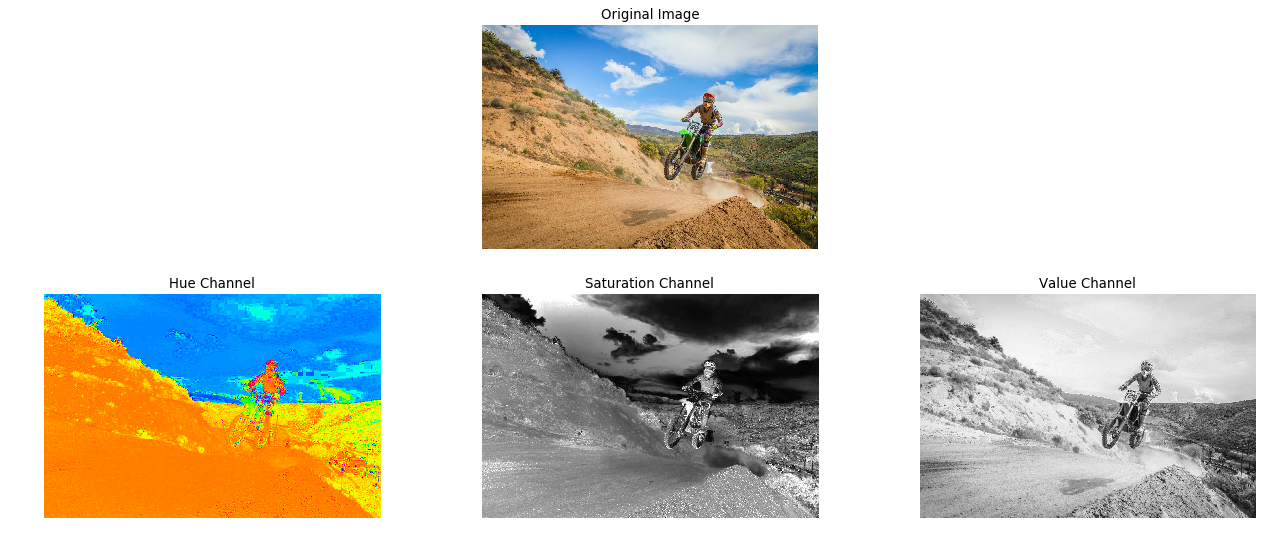

In [39]:
img_BGR = cv2.imread('data/images/motorbike.jpeg')
img_HSV = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2HSV)
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)

hue_channel, saturation_channel, value_channel = cv2.split(img_HSV)

plt.figure(figsize = (20, 8))

plt.subplot(232)
plt.imshow(img_RGB)
plt.title("Original Image")
plt.axis('off')

plt.subplot(234)
plt.imshow(hue_channel, cmap = 'hsv') # Notice the cmap for displaying a HUE channel
plt.title("Hue Channel")
plt.axis('off')

plt.subplot(235)
plt.imshow(saturation_channel, cmap = 'gray')
plt.title("Saturation Channel")
plt.axis('off')

plt.subplot(236)
plt.imshow(value_channel, cmap = 'gray')
plt.title("Value Channel")
plt.axis('off');

Again, the hue channel gives us information about the color, the saturation channel specifies the how vivid that color is, and the value indicates how bright that color is.

- Hue Channel: The color of the pixel
- Saturation Channel: A lighter region corresponds to a more vivid color. A darker region corresponds to a less vivid color
- Value Channel: A ligther region corresponds to more brightness. A darker region corresponds to less brightness

Let us see the effect of manipulating the saturation channel. For this example, we will increase the saturation by 50% so we expect to see more vivid colors. 

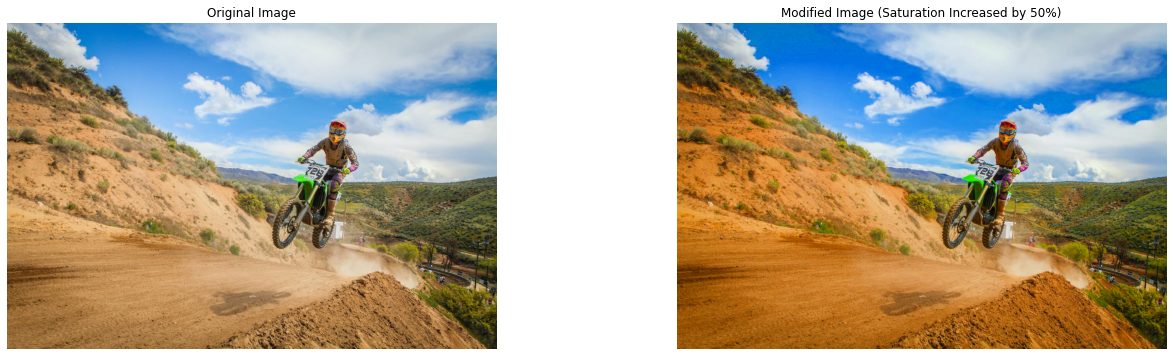

In [11]:
saturation_channel = 1.5 * saturation_channel # Increase the saturation channel values by a factor of 1.5 - This step will also convert the values from unsigned int to float.
saturation_channel = saturation_channel.clip(0, 255) # Clip the values to ensure they remain within the valid range [0, 255]
saturation_channel = saturation_channel.astype(np.uint8) # Convert the modified saturation channel to unsigned 8-bit integers

img_HSV_modified = cv2.merge([hue_channel, saturation_channel, value_channel]) # Merge the modified HSV components to form a new HSV image
img_RGB_modified = cv2.cvtColor(img_HSV_modified, cv2.COLOR_HSV2RGB) # Convert the modified HSV image to RGB for visualization

plt.figure(figsize = (22,6))

plt.subplot(121)
plt.imshow(img_RGB)
plt.title("Original Image")
plt.axis('off')

plt.subplot(122)
plt.imshow(img_RGB_modified)
plt.title("Modified Image (Saturation Increased by 50%)");
plt.axis('off');

The professor showed more examples by changing the hue and value channels as well. You can view those in his notebook.
> Remember to use `Shift + TAB` to bring up the documentation incase you forget the parameters of a function or how the function works. For example, try using `SHIFT + TAB` to figure out how `np.clip()` works.

---

## **White Balancing**

Moving on, let us now discuss White Balancing. **White balancing** is an aspect of image processing that aims to correct color cast issues in photographs, ensuring that the colors appear natural and neutral. The term "color cast" refers to an unwanted tint or dominance of a particular color in an image, often caused by the lighting conditions under which the photo was taken.

Let us code a White Balancing algorithm using the "Gray World Assumption" approach. The approach assumes that for a balanced image, the mean values of each color channel should be equal, resulting in a neutral gray appearance. If this assumption fails, then the resulting image will look weird. We will:
- Compute the average value of each color channel
- Compute the overall average
- Scale each color channel by dividing the overall average by the average of that specific color channel.

Let us begin by reading in the image. Also, since we'll be applying algebriac manipulation to the image (pixel values), it's a good idea to convert from uint8 to float64.

In [44]:
img = cv2.imread('data/images/white-imbalance.jpg')
img = img.astype(np.float64)

We'll now take the mean of each of the color channels. To access a specific channel, we'll make use of numpy slicing. The general syntax is:

`img[rows, cols, channels]`

In [46]:
red_channel = img[:, :, 2] # select all the rows and all the columns from channel 2 (IN BGR, Red is channel 2)
avg_red_channel = np.mean(red_channel) # Use Shift + TAB to figure out what this does

green_channel = img[:, :, 1]
avg_green_channel = np.mean(green_channel)

blue_channel = img[:, :, 0]
avg_blue_channel = np.mean(blue_channel)
# avg_blue_channel = np.mean(img[:, :, 0]) You can perform the two statments in a single line

Now, we can take the overall average and compute the scaling factor for each channel

In [47]:
avg_overall = 1/3 * (avg_blue_channel + avg_green_channel + avg_red_channel)

scale_red_channel = avg_overall / avg_red_channel
scale_green_channel = avg_overall / avg_green_channel
scale_blue_channel = avg_overall / avg_blue_channel

We have the scaling factors. Now all that's left is to scale each channel by the corresponding factor and merge the channels to produce the new image.

In [48]:
blue_channel = blue_channel * scale_blue_channel
green_channel = green_channel * scale_green_channel
red_channel = red_channel * scale_red_channel

### We could have also done
# blue_channel  *= scale_blue_channel
# green_channel *= scale_green_channel
# red_channel   *= scale_red_channel

img_BGR_modified = cv2.merge([blue_channel, green_channel, red_channel])

# Before displyaing the image, make sure it is in the proper format: (1) range between [0 255] (2) data type in unsigned 8 bits
img_BGR_modified = np.clip(img_BGR_modified, 0, 255) 
img_BGR_modified = img_BGR_modified.astype(np.uint8)
img = img.astype(np.uint8)

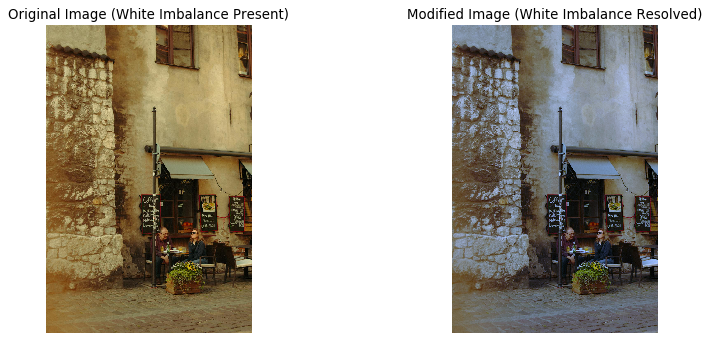

In [50]:
img_white_imbalance = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_white_balance = cv2.cvtColor(img_BGR_modified, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (12, 5))


plt.subplot(121)
plt.imshow(img_white_imbalance)
plt.title("Original Image (White Imbalance Present)")
plt.axis('off')

plt.subplot(122)
plt.imshow(img_white_balance)
plt.title("Modified Image (White Imbalance Resolved)")
plt.axis('off');

---

## **Histograms**

Moving on, let us now discuss Histograms. **Histograms** are graphical representations of the distribution of pixel intensities in an image. They provide valuable insights into the image's tonal distribution, allowing you to understand the overall brightness, contrast, and presence of specific tones in the image.

We will be using OpenCV to compute the values of the histogram (using the `calcHist()` function), and then Matplotlib to actually draw the histogram (Using the `plot()` method). Let us first begin with grayscale images.

As a matter of fact, the `imread()` method can be modified to read in an image as GRAYSCALE by default. The alternative option would be to read in an image as BGR and then convert it to GRAYSACLE using the `cvtColor()` method.

In [17]:
img_GRAY = cv2.imread('data/images/motorbike.jpeg', cv2.IMREAD_GRAYSCALE)

# img_BGR = cv.imread('data/images/motorbike.jpeg')
# img_GRAY = cv.cvtColor(img_BGR, cv.COLOR_BGR2GRAY)

The syntax of the calcHist() is as follows:

`cv2.calcHist(images, channels, mask, histSize, ranges)`
- images: The source image or list of source images
- channels: A list of indices specifying what color channels to consider for the histogram. For grayscale images, this is 0.
- mask: An optional parameter to specify any particular region in the image.
- hitSize: It represents the number of bins in the histogram
- ranges: This specifies the range of pixel values to be considered for each channel

The below line stores the values of the histogram in the output variable

In [18]:
hist = cv2.calcHist([img_GRAY], [0], None, [256], [0, 255])

To plot it, we will make use of matplotlib.

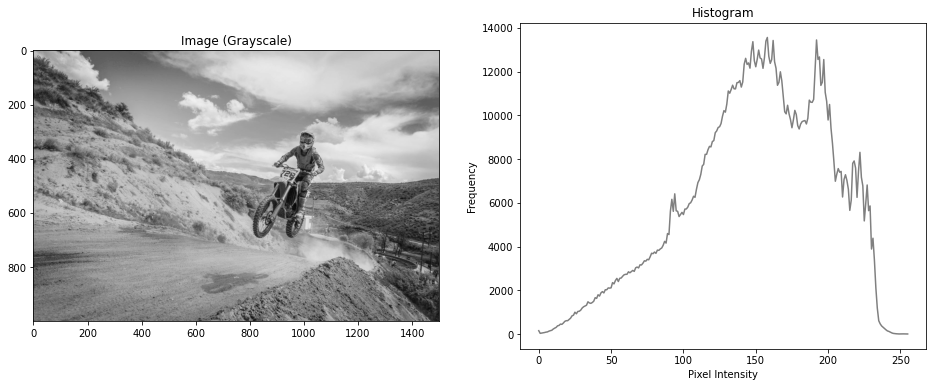

In [19]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6))

ax1.imshow(img_GRAY, cmap = 'gray')
ax1.set_title("Image (Grayscale)")

ax2.plot(hist, color = 'gray')
ax2.set_title("Histogram")
ax2.set_xlabel("Pixel Intensity")
ax2.set_ylabel("Frequency");

Now, let's do the same steps but for a colored image.

In [20]:
img_BGR = cv2.imread('data/images/motorbike.jpeg')
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)

hist_blue = cv2.calcHist([img_BGR], [0], None, [256], [0, 255])
hist_green = cv2.calcHist([img_BGR], [1], None, [256], [0, 255])
hist_red = cv2.calcHist([img_BGR], [2], None, [256], [0, 255])

We may plot each histogram on a separate axis or we could plot all three on the same axes. I'll go with the latter option.

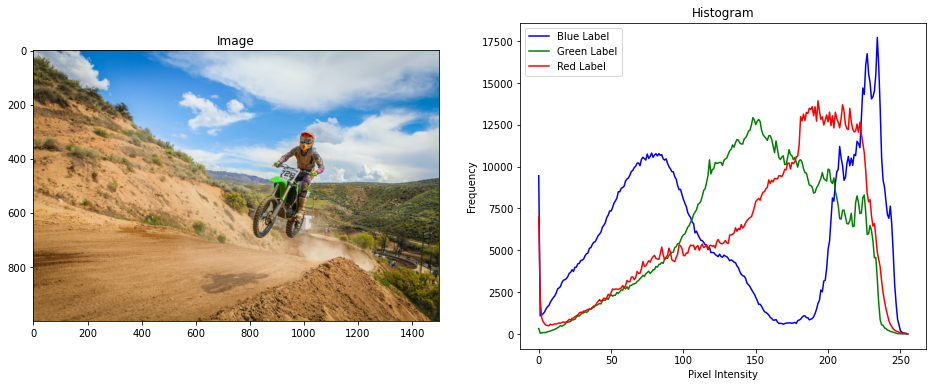

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6))

ax1.imshow(img_RGB)
ax1.set_title("Image")

ax2.plot(hist_blue, color = 'blue', label = "Blue Label")
ax2.plot(hist_green, color = 'green', label = "Green Label")
ax2.plot(hist_red, color = 'red', label = "Red Label")
ax2.set_title("Histogram")
ax2.set_xlabel("Pixel Intensity")
ax2.set_ylabel("Frequency")
ax2.legend();

It is common to use a for-loop when plotting colored histograms as follows:

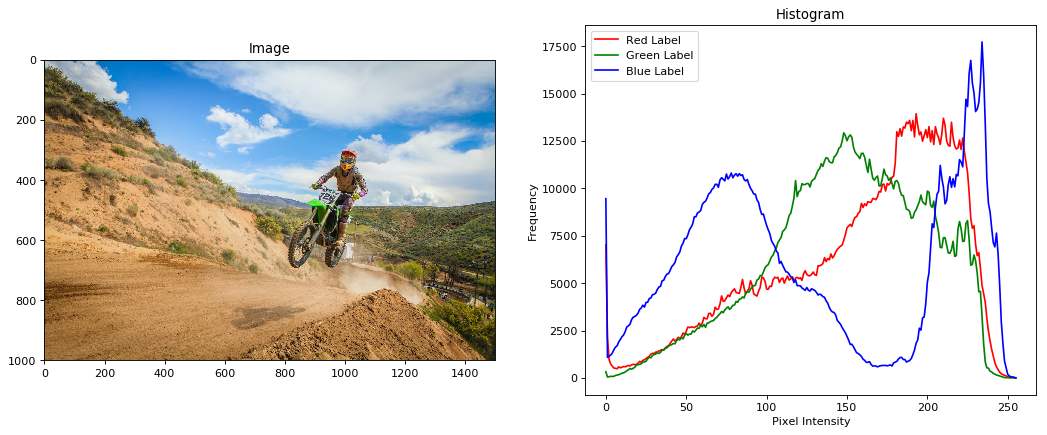

In [54]:
img_BGR = cv2.imread('data/images/motorbike.jpeg')
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6))

ax1.imshow(img_RGB)
ax1.set_title("Image")

colors = ['Red', 'Green', 'Blue']

for i, color in enumerate(colors):
    hist = cv2.calcHist([img_RGB], [i], None, [256], [0, 255])
    ax2.plot(hist, color = color, label = f"{color} Label")

ax2.set_title("Histogram")
ax2.set_xlabel("Pixel Intensity")
ax2.set_ylabel("Frequency")
ax2.legend();

To view all the available color names provided by Matplotlib, [click here](https://matplotlib.org/stable/gallery/color/named_colors.html)